In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from scipy.stats import skew
import pylab as p
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\LENOVO\Downloads\DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

Task 1 

In [4]:
df.loc[:,['genres','title']].head(50)

,genres,title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter
5,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",Spider-Man 3
6,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",Tangled
7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avengers: Age of Ultron
8,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Harry Potter and the Half-Blood Prince
9,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Batman v Superman: Dawn of Justice


 Task 2 

In [7]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Task 3 

In [9]:
df[(df['budget']>220000) & (df['title'])][['budget','title']]

,budget,title
0,237000000,Avatar
1,300000000,Pirates of the Caribbean: At World's End
2,245000000,Spectre
3,250000000,The Dark Knight Rises
4,260000000,John Carter
...,...,...
4680,450000,Malevolence
4682,13000000,Super Hybrid
4720,8500000,The Birth of a Nation
4758,4000000,The Signal


 Task 4

In [11]:
df[(df['revenue']>961000000) & (df['title'])][['revenue','title']]

,revenue,title
0,2787965087,Avatar
3,1084939099,The Dark Knight Rises
7,1405403694,Avengers: Age of Ultron
12,1065659812,Pirates of the Caribbean: Dead Man's Chest
16,1519557910,The Avengers
17,1045713802,Pirates of the Caribbean: On Stranger Tides
25,1845034188,Titanic
26,1153304495,Captain America: Civil War
28,1513528810,Jurassic World
29,1108561013,Skyfall


Task 5 

In [13]:
df = df[(df['budget'] != 0) & (df['revenue'] != 0)]

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
3225,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110
3226,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": "

 Task 6 

In [15]:
revenue = df.sort_values(by='revenue', ascending=False).head(10)
revenue

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
123,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",27-11-2013,1274219009,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295
31,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,"[

In [16]:
budget = df.sort_values(by='budget', ascending=True).head(10)
budget

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3078,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",05-02-1936,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856
2791,4,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,22649,"[{""id"": 131, ""name"": ""italy""}, {""id"": 428, ""na...",en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,1.199451,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",08-12-1932,25,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every woman who has loved will understand,A Farewell to Arms,6.2,28
2652,7,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,13006,"[{""id"": 3528, ""name"": ""flooding""}, {""id"": 9685...",en,Split Second,"In a futuristic London, the rising sea levels ...",4.857028,"[{""name"": ""Entertainment"", ""id"": 7676}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",01-05-1992,5,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's seen the future. Now he has to kill it.,Split Second,5.7,63
2671,7,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,38415,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 18705...",en,Bran Nue Dae,In the Summer of 1965 a young man is filled wi...,0.050456,[],[],09-08-2009,7,82.0,[],Released,Bran Nue Dae,Bran Nue Dae,5.2,6
3187,8,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 27, ""na...",NaN,11980,"[{""id"": 290, ""name"": ""angel""}, {""id"": 3648, ""n...",en,The Prophecy,The angel Gabriel comes to Earth to collect a ...,11.818333,"[{""name"": ""Dimension Films"", ""id"": 7405}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",01-09-1995,16,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"On ancient ground, at the edge of the world, a...",The Prophecy,6.4,138
2521,10,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://hrosss.is/the-film/,217708,"[{""id"": 2673, ""name"": ""horse""}, {""id"": 3373, ""...",is,Hross í oss,A country romance about the human streak in th...,1.617943,"[{""name"": ""Filmhuset Gruppen"", ""id"": 68384}, {...","[{""iso_3166_1"": ""NO"", ""name"": ""Norway""}, {""iso...",30-08-2013,11,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Of Horses and Men,6.9,26
2522,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",28-09-2013,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your pain is her pleasure.,Nurse 3-D,4.9,119
2405,11,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",NaN,28932,[],en,F.I.S.T.,Johnny Kovak joins the Teamsters trade-union i...,3.375208,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",26-04-1978,11,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,F.I.S.T.,6.4,29
1694,25,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10397,"[{""id"": 1625, ""name"": ""emigration""}, {""id"": 18...",en,Angela's Ashes,Based on the best selling autobiography by Iri...,4.887940,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": 

Task 7 

In [18]:
df['budget'].corr(df['popularity'])

0.4319901360079746

Task 8 

In [20]:
df['production_companies'].value_counts()

[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                                             48
[]                                                                                                                                                                                                    41
[{"name": "Universal Pictures", "id": 33}]                                                                                                                                                            35
[{"name": "New Line Cinema", "id": 12}]                                                                                                                                                               29
[{"name": "Columbia Pictures", "id": 5}]                                                                                                                                                            

Task 9

In [22]:
df['production_companies'].value_counts().head(25)

[{"name": "Paramount Pictures", "id": 4}]                                                                           48
[]                                                                                                                  41
[{"name": "Universal Pictures", "id": 33}]                                                                          35
[{"name": "New Line Cinema", "id": 12}]                                                                             29
[{"name": "Columbia Pictures", "id": 5}]                                                                            28
[{"name": "Twentieth Century Fox Film Corporation", "id": 306}]                                                     25
[{"name": "Warner Bros.", "id": 6194}]                                                                              24
[{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}]                                                                 24
[{"name": "Walt Disney Pictures", "id": 2}]     

Task 10 

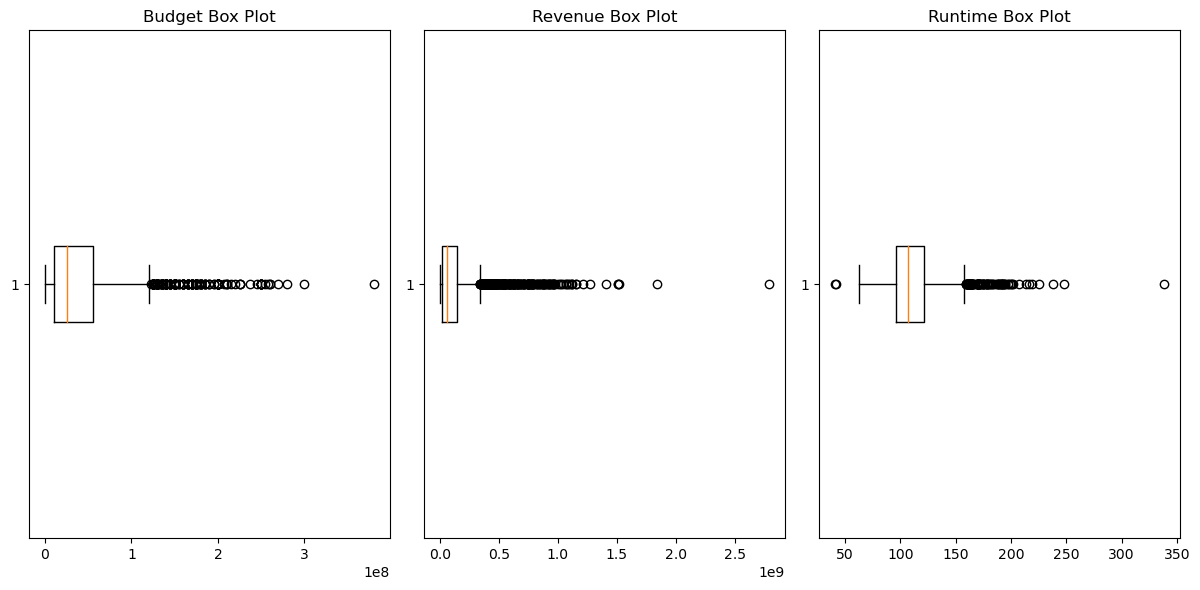

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df['budget'], vert=False)
plt.title('Budget Box Plot')

plt.subplot(1, 3, 2)
plt.boxplot(df['revenue'], vert=False)
plt.title('Revenue Box Plot')

plt.subplot(1, 3, 3)
plt.boxplot(df['runtime'], vert=False)
plt.title('Runtime Box Plot')

plt.tight_layout()
plt.show()

Task 11

In [26]:
# Calculate the average runtime for the top 500 movies
average_runtime = df['runtime'].mean()

# Filter the movies with above-average runtime
above_average_runtime_movies = df[df['runtime'] > average_runtime]

# Display the names of the movies and their runtimes
movie_names_runtimes = above_average_runtime_movies[['original_title', 'runtime']]
movie_names_runtimes

,original_title,runtime
0,Avatar,162.0
1,Pirates of the Caribbean: At World's End,169.0
2,Spectre,148.0
3,The Dark Knight Rises,165.0
4,John Carter,132.0
...,...,...
3191,Chasing Amy,113.0
3197,The Big Parade,151.0
3215,The Birth of a Nation,120.0
3216,Facing the Giants,111.0
